# **data preprocessing and EDA**

In [ ]:
import pandas as pd
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.head()

age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0

In [ ]:
data.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [ ]:
print(data.duplicated().sum())

272


In [ ]:
data.shape

(1190, 12)

In [ ]:
data.describe()

age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636         0.487360   
min               0.000000     0.000000       60.000000         0.000000   
25%               0.000000     0.000000      121.000000         0.000000   
50%               0.000000     0.000000      140.500000         0.000000   
75%               0.000000     2.000000      160.000000         1.000000   
max               1.000000     2.000000      202.000000         1.000000   

           oldpeak     ST slope       target  
count  1190.000000  1190.000000  1190.000000  
mean      0.922773     1.624370     0.528571  
std       1.086337     0.610459     0.499393  
min      -2.600000     0.000000     0.000000  
25%       0.000000     1.000000     0.000000  
50%       0.600000     2.000000     1.000000  
75%       1.600000     2.000000     1.000000  
max       6.200000     3.000000     1.000000

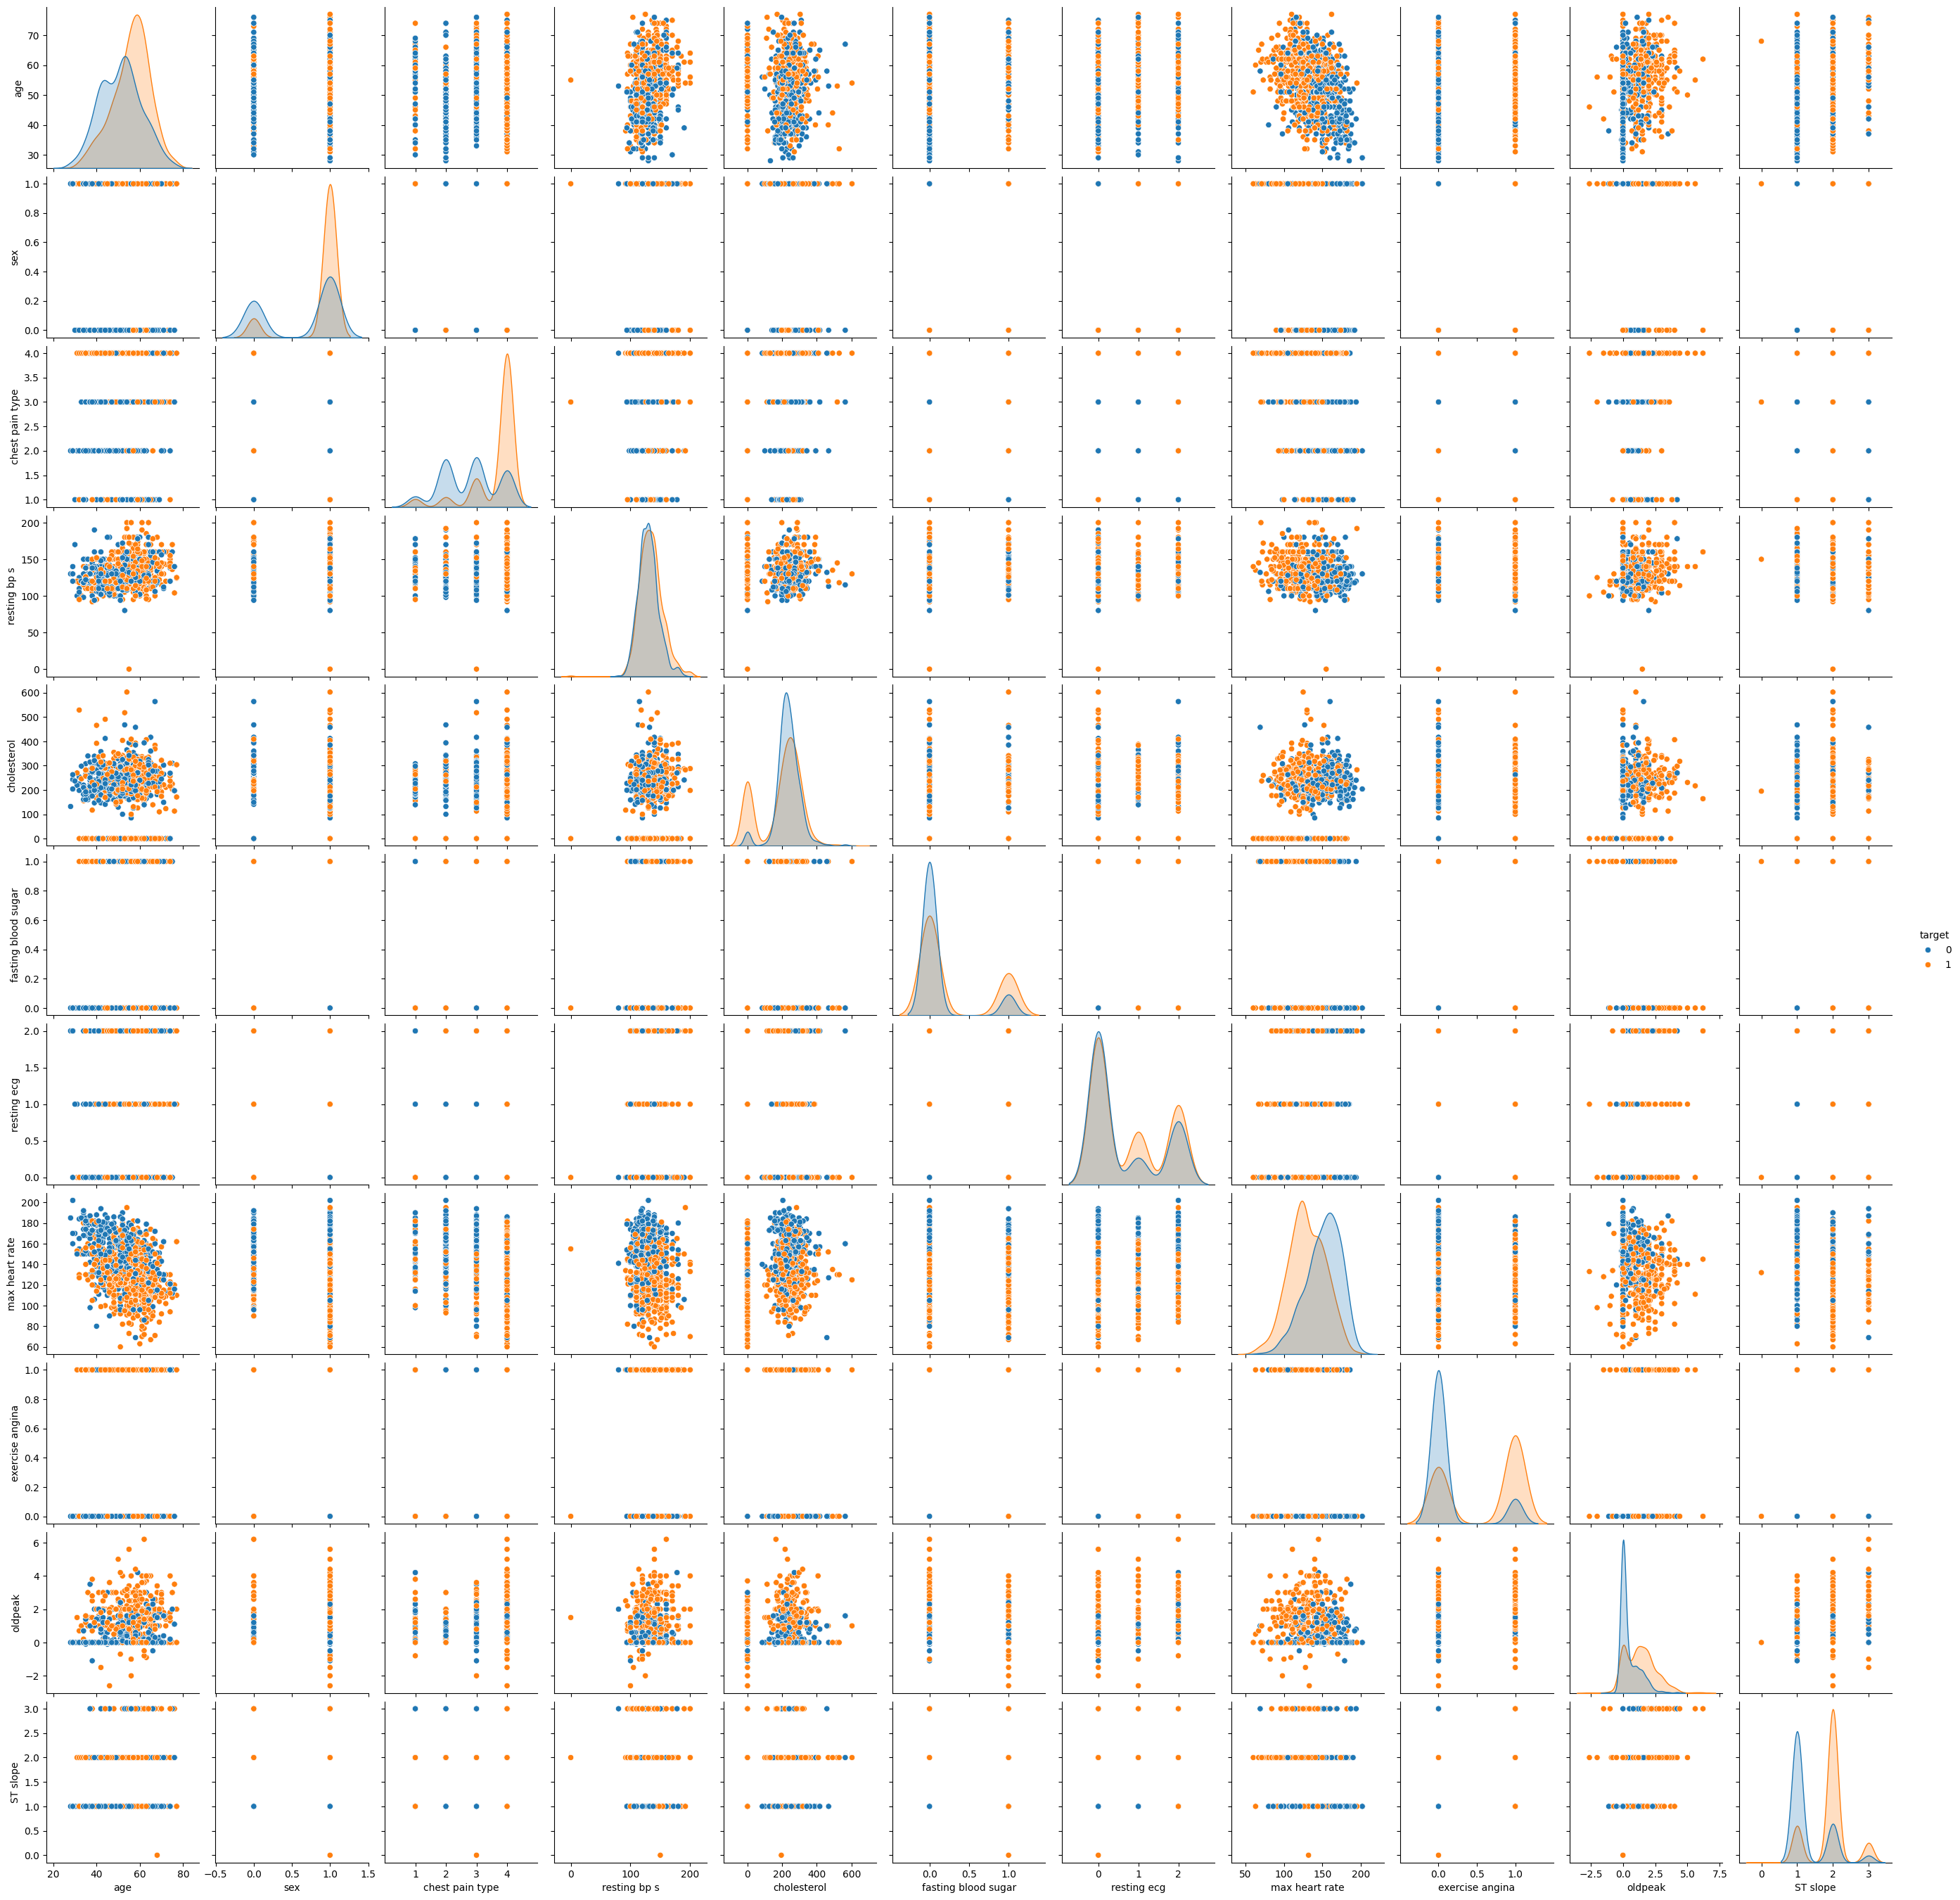

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(data,hue='target')
plt.show()

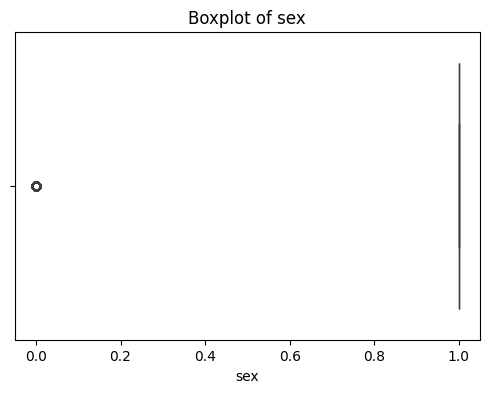

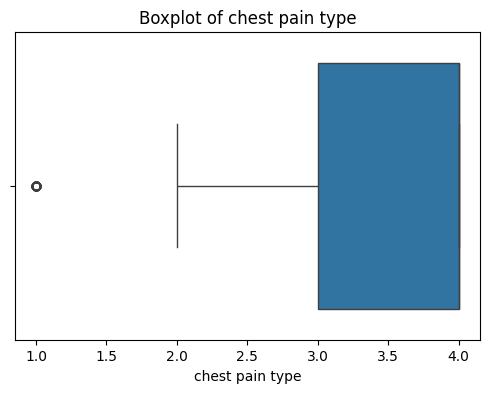

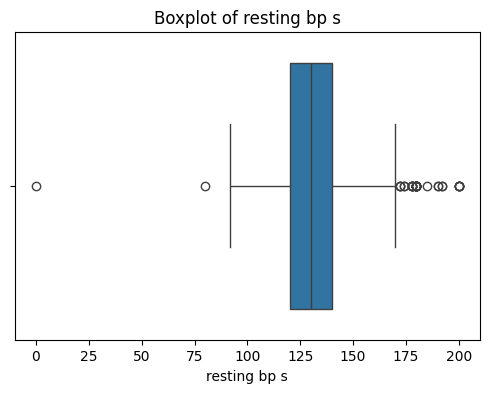

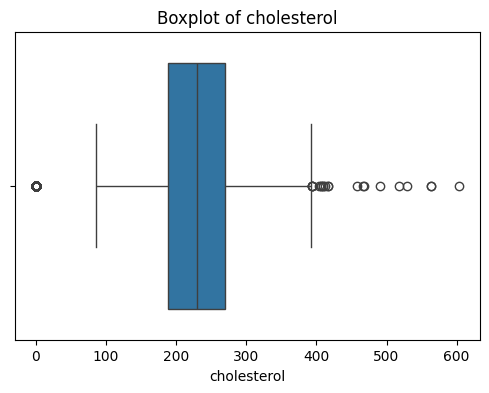

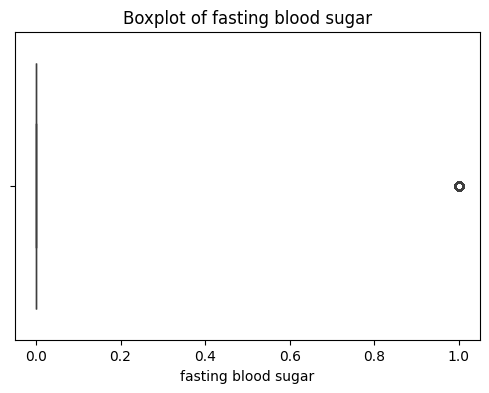

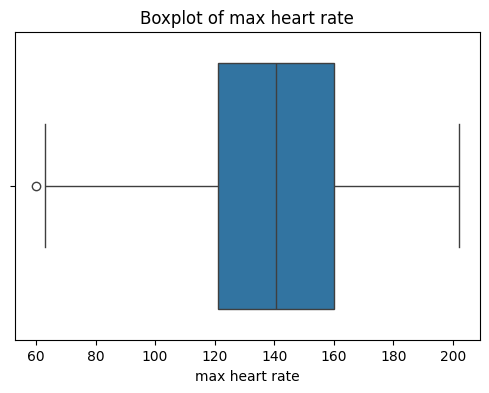

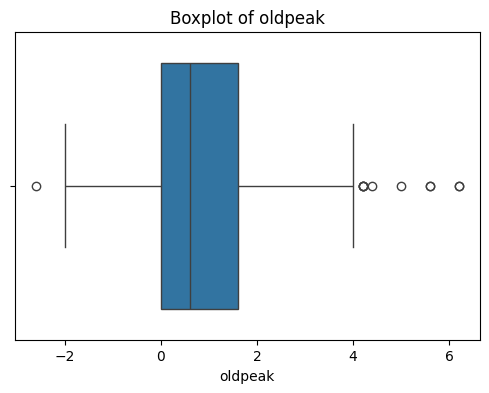

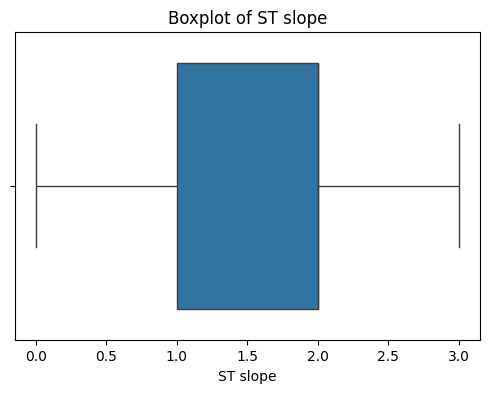

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

exclude_columns = ['target', 'excercise angina', 'resting ecg']
features = data.select_dtypes(include=['number']).columns
numerical_features = features.drop(exclude_columns, errors='ignore')

for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
Q1 = data[numerical_features].quantile(0.25)
Q3 = data[numerical_features].quantile(0.75)
IQR = Q3 - Q1
outliers=(data[numerical_features] < (Q1 - 1.5 * IQR)) | (data[numerical_features] > (Q3 + 1.5 * IQR))
print(outliers.sum())

age                      0
sex                    281
chest pain type         66
resting bp s            37
cholesterol            193
fasting blood sugar    254
max heart rate           1
exercise angina          0
oldpeak                 11
ST slope                 0
dtype: int64


In [ ]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

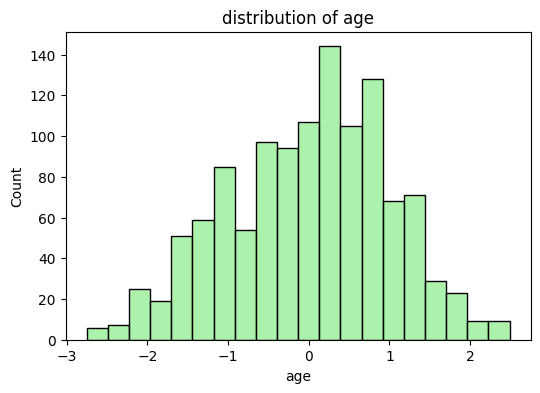

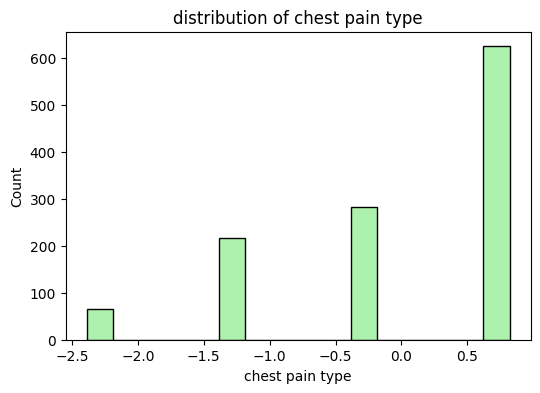

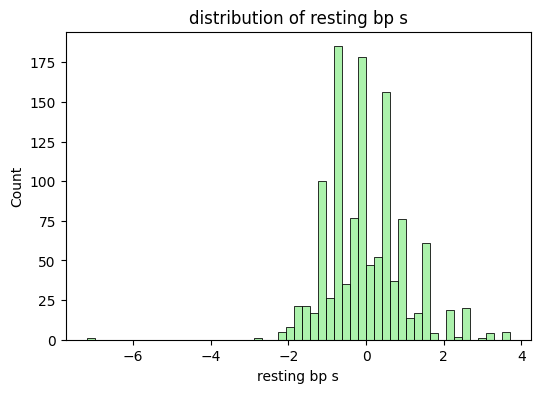

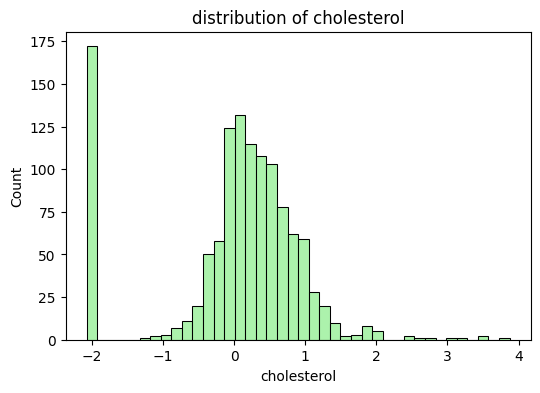

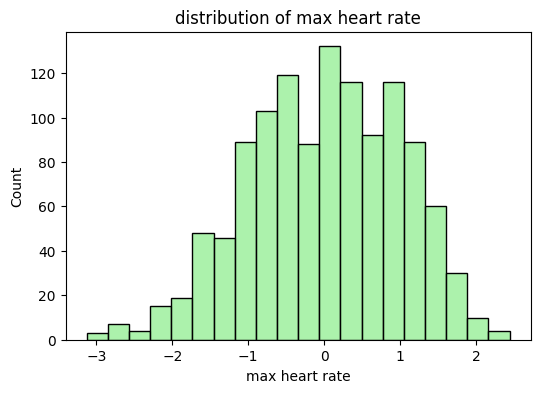

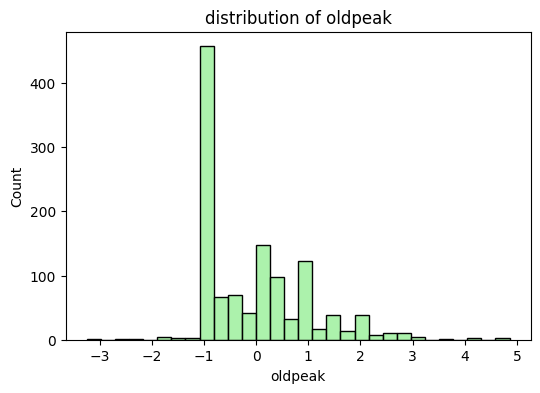

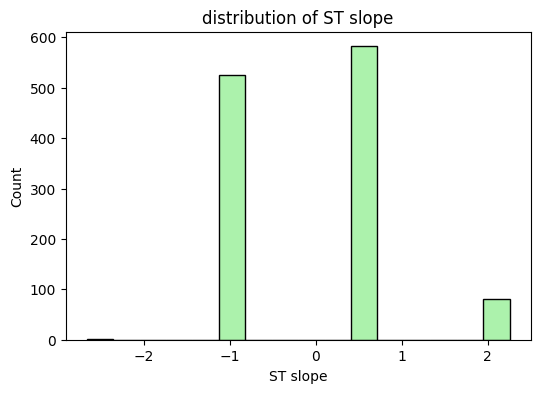

In [ ]:
features=['age','chest pain type', 'resting bp s', 'cholesterol', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(x=data[feature],color='lightgreen')
    plt.title(f'distribution of {feature}')
    plt.show()

In [ ]:
data[features].head()

age  chest pain type  resting bp s  cholesterol  resting ecg  \
0   40                2           140          289            0   
1   49                3           160          180            0   
2   37                2           130          283            1   
3   48                4           138          214            0   
4   54                3           150          195            0   

   max heart rate  oldpeak  ST slope  
0             172      0.0         1  
1             156      1.0         2  
2              98      0.0         1  
3             108      1.5         2  
4             122      0.0         1

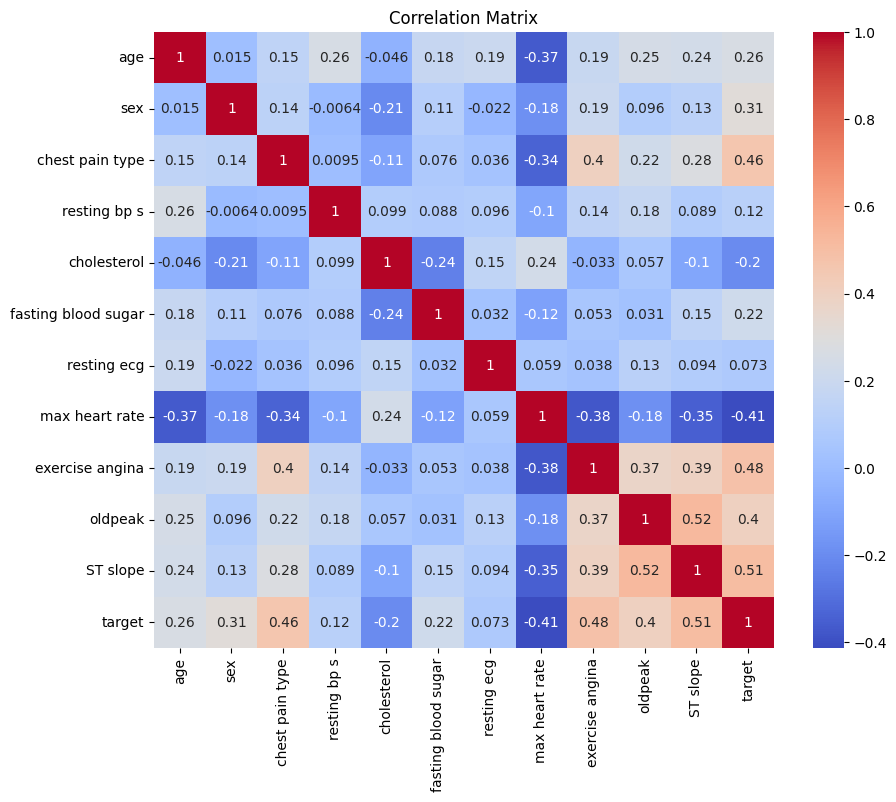

In [ ]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])
data.head()

age  sex  chest pain type  resting bp s  cholesterol  \
0 -1.466728    1        -1.318351      0.427328     0.775674   
1 -0.504600    0        -0.248932      1.516587    -0.299512   
2 -1.787437    1        -1.318351     -0.117301     0.716489   
3 -0.611503    0         0.820487      0.318402     0.035867   
4  0.029915    1        -0.248932      0.971958    -0.151550   

   fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                    0    -0.802672        1.265039                0   
1                    0    -0.802672        0.637758                0   
2                    0     0.346762       -1.636136                0   
3                    0    -0.802672       -1.244085                1   
4                    0    -0.802672       -0.695214                0   

    oldpeak  ST slope  target  
0 -0.849792 -1.023217       0  
1  0.071119  0.615583       1  
2 -0.849792 -1.023217       0  
3  0.531575  0.615583       1  
4 -0.849792 -1.023217       0

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('target',axis=1)
y=data['target']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# **SVC model**

In [ ]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.metrics import confusion_matrix
svm_sigmoid = SVC(kernel='sigmoid')
svm_sigmoid.fit(x_train, y_train)
y_pred_svm = svm_sigmoid.predict(x_test)


svm_acc = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(" SVM Classifier Performance:")
print(f"Accuracy: {svm_acc:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

 SVM Classifier Performance:
Accuracy: 0.79, Precision: 0.78, Recall: 0.85, F1-score: 0.82
Confusion Matrix:
[[ 76  31]
 [ 19 112]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       107
           1       0.78      0.85      0.82       131

    accuracy                           0.79       238
   macro avg       0.79      0.78      0.78       238
weighted avg       0.79      0.79      0.79       238



# **SVC using rbf kernel showed the best results**

In [ ]:
svm_rbf= SVC(kernel='rbf',probability=True)
svm_rbf.fit(x_train, y_train)
y_pred_svm = svm_rbf.predict(x_test)


svm_acc = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(" SVM Classifier Performance:")
print(f"Accuracy: {svm_acc:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

 SVM Classifier Performance:
Accuracy: 0.88, Precision: 0.87, Recall: 0.92, F1-score: 0.89
Confusion Matrix:
[[ 89  18]
 [ 11 120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       107
           1       0.87      0.92      0.89       131

    accuracy                           0.88       238
   macro avg       0.88      0.87      0.88       238
weighted avg       0.88      0.88      0.88       238



In [ ]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
y_pred_svm = svm_linear.predict(x_test)

# Evaluate performance
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)
classification_rep = classification_report(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
print(" SVM Classifier Performance:")
print(f"Accuracy: {svm_acc:.2f}, Precision: {svm_precision:.2f}, Recall: {svm_recall:.2f}, F1-score: {svm_f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

 SVM Classifier Performance:
Accuracy: 0.84, Precision: 0.86, Recall: 0.86, F1-score: 0.86
Confusion Matrix:
[[ 88  19]
 [ 18 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       107
           1       0.86      0.86      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



# **LIME**

In [ ]:
!pip install lime

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


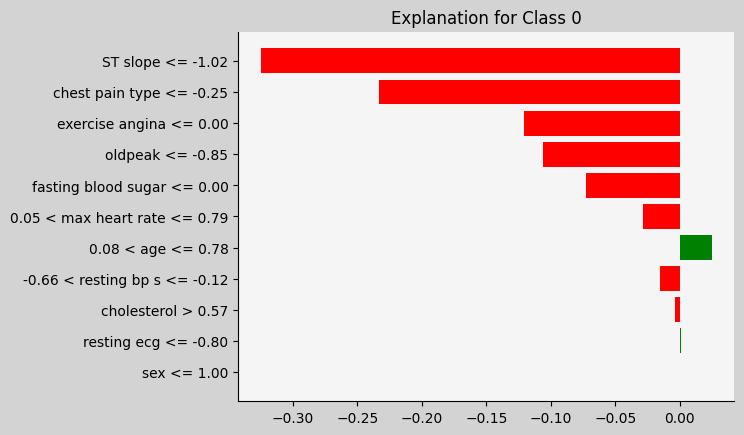

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


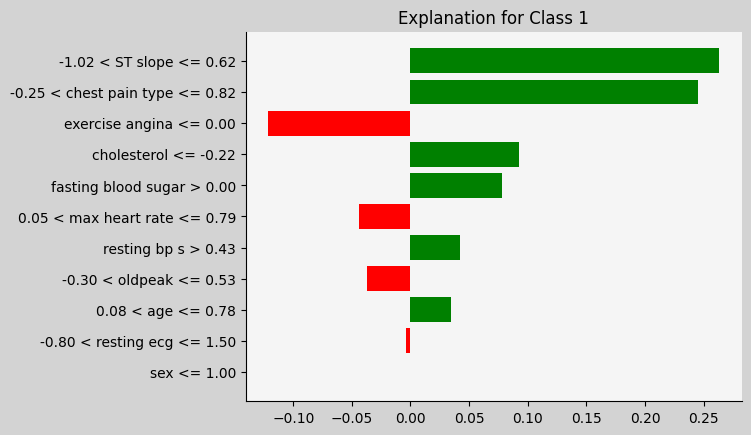

In [ ]:
import matplotlib.pyplot as plt
from lime.lime_tabular import LimeTabularExplainer

training_data = x_train.values
explainer = LimeTabularExplainer(training_data, feature_names=x_train.columns)
classes = data['target'].unique()
for class_label in classes:
    instance_index = y_test[y_test == class_label].index[0]
    instance = x_test.loc[instance_index].values
    explanation = explainer.explain_instance(instance, svm_rbf.predict_proba, num_features=len(x_train.columns))
    fig = explanation.as_pyplot_figure()
    fig.patch.set_facecolor('lightgray')
    ax = fig.gca()
    ax.set_facecolor('whitesmoke')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.title(f'Explanation for Class {class_label}')
    plt.show()

# **PDP**

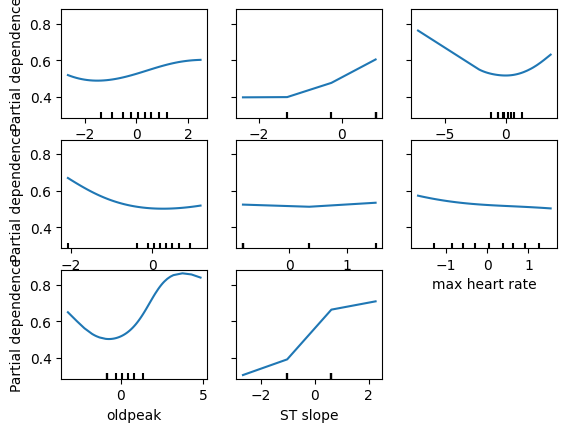

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
pdp_display = PartialDependenceDisplay.from_estimator(svm_rbf, x_train, features)
plt.show()

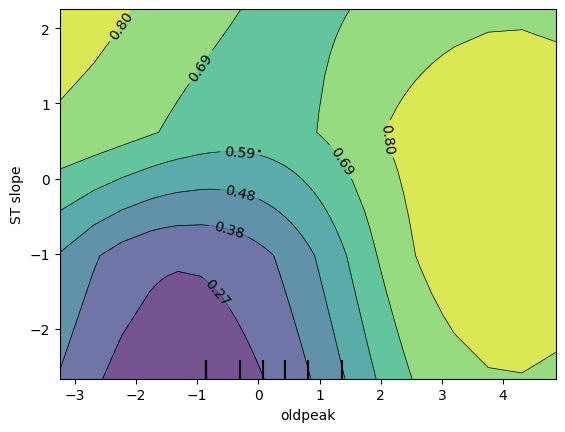

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
features_2d = [('oldpeak', 'ST slope')]
pdp_display = PartialDependenceDisplay.from_estimator(svm_rbf, x_train, features_2d)
plt.show()

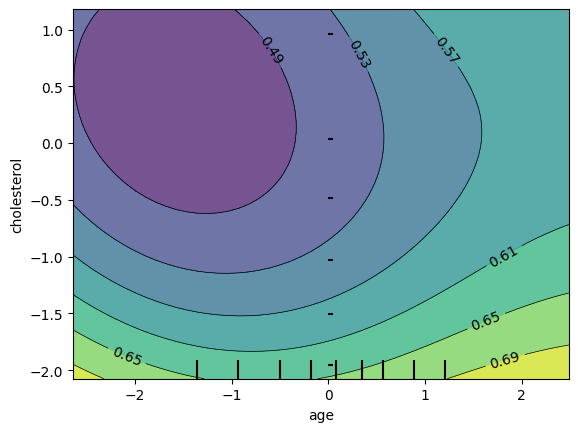

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
features_2d = [('age', 'cholesterol')]
pdp_display = PartialDependenceDisplay.from_estimator(svm_rbf, x_train, features_2d)
plt.show()

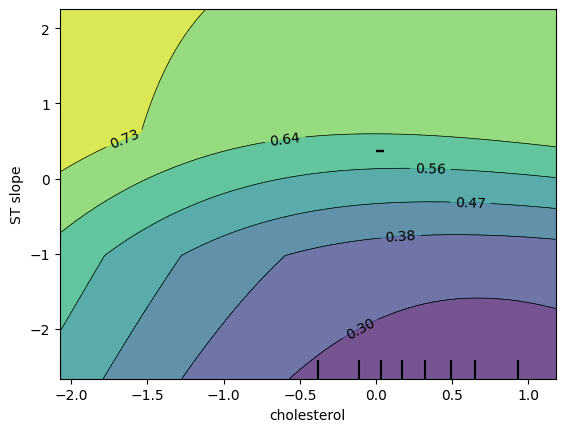

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt
features_2d = [('cholesterol', 'ST slope')]
pdp_display = PartialDependenceDisplay.from_estimator(svm_rbf, x_train, features_2d)
plt.show()

# **ICE**

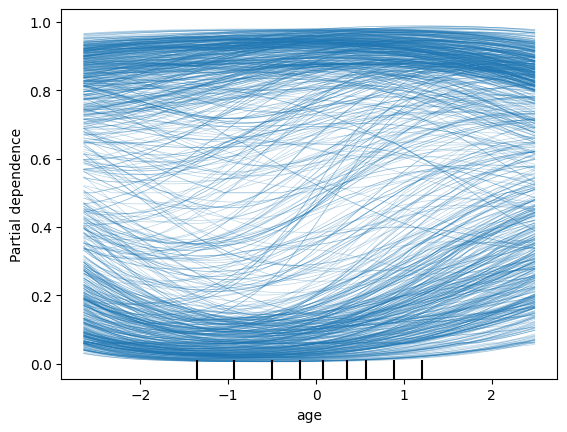

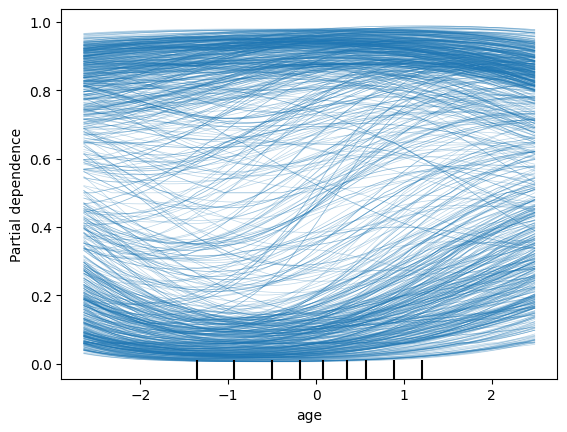

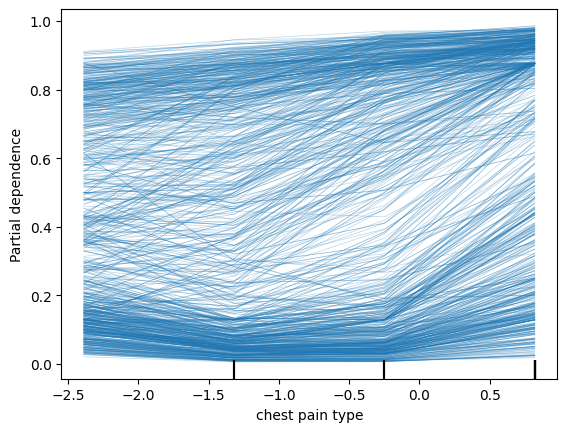

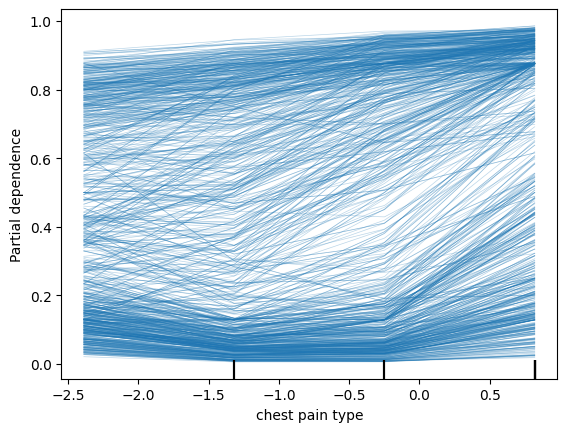

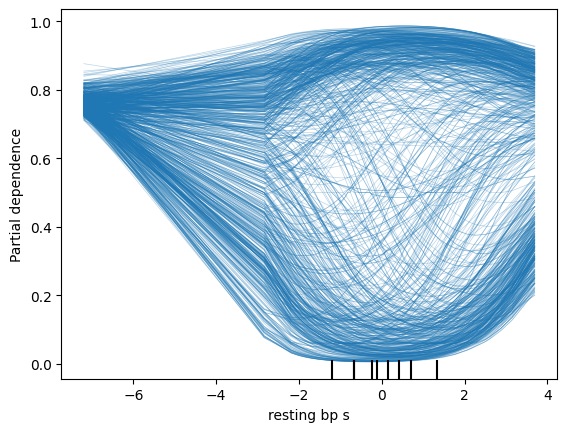

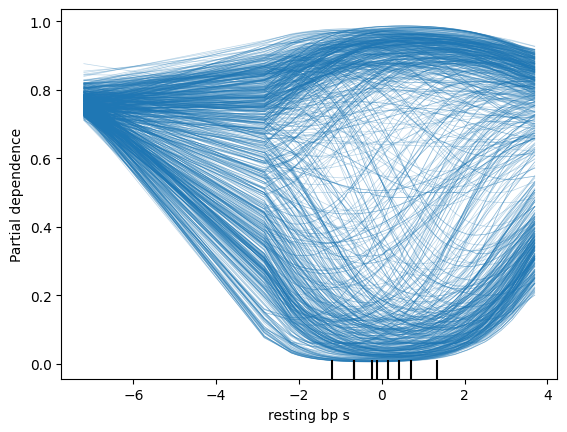

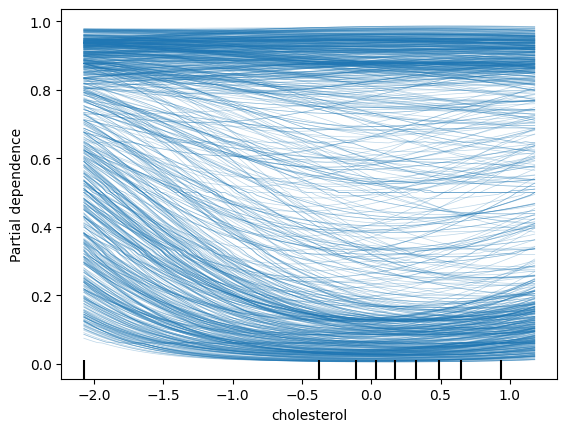

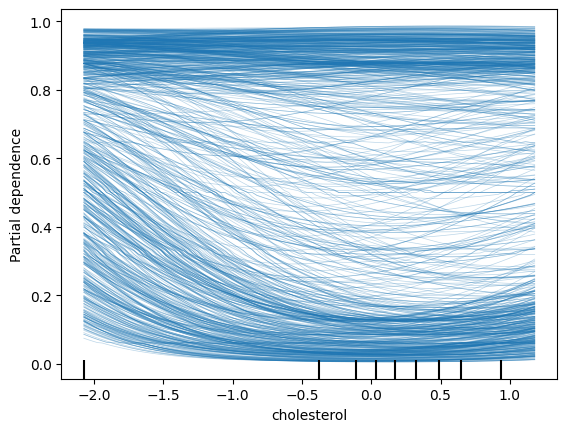

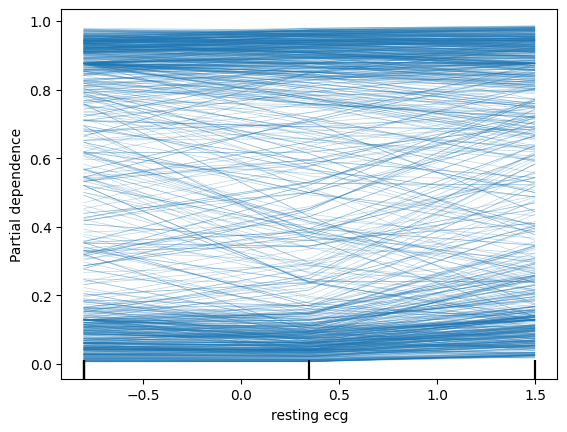

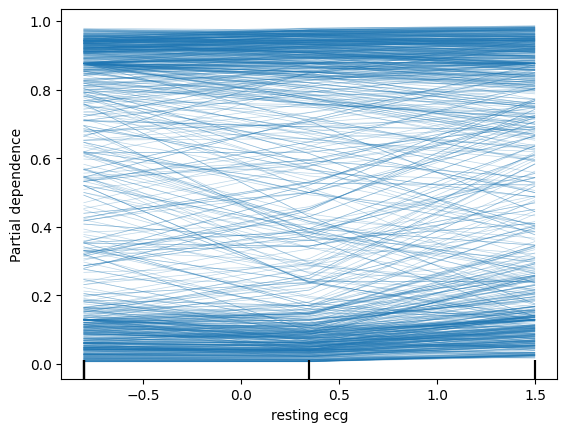

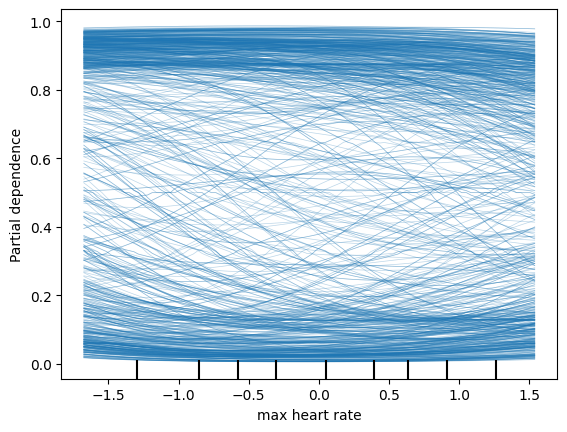

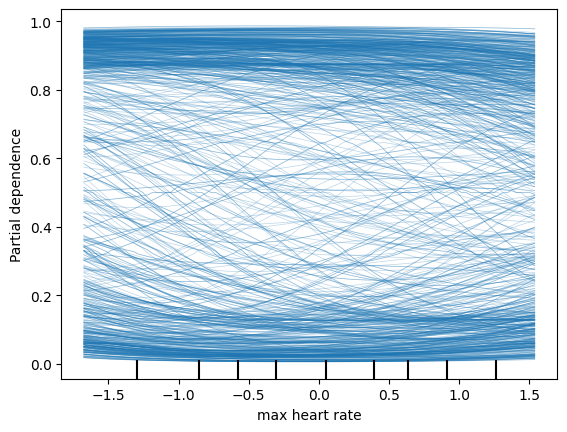

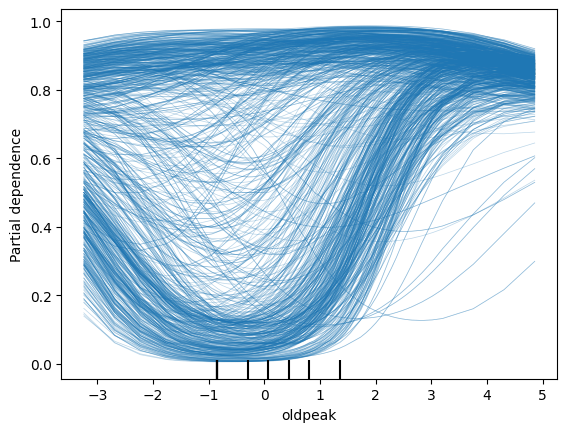

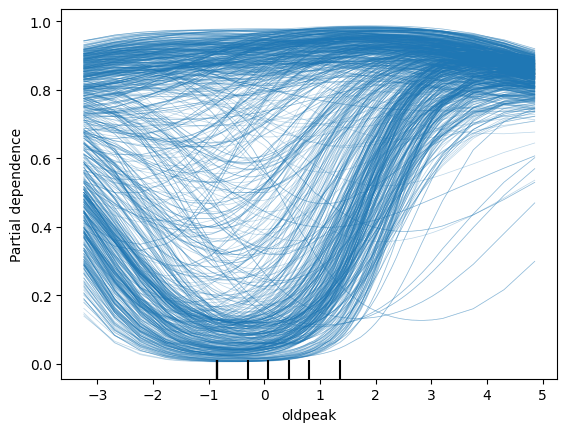

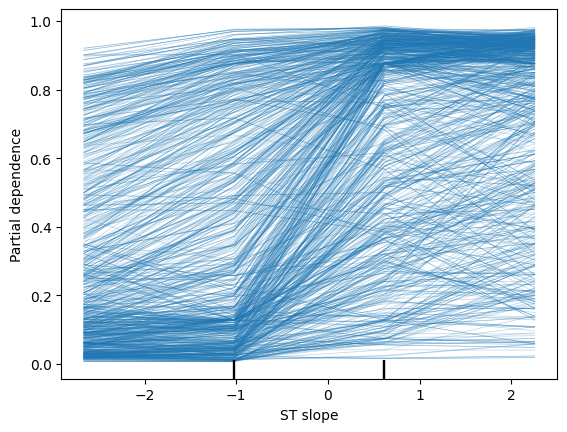

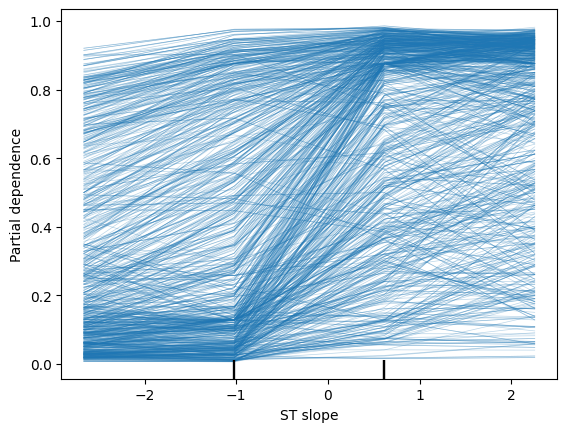

In [ ]:
for feature in features:
  pdp_display = PartialDependenceDisplay.from_estimator(
    svm_rbf, x_train, [feature], kind='individual'
  )
  pdp_display.plot()
  plt.show()